In [6]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import accuracy_score , confusion_matrix

In [7]:
data = pd.read_csv( 'data.csv' )
data.head()

label      x1      x2
0      1  2.6487  4.5192
1      1  1.5438  2.4443
2      1  1.8990  4.2409
3      1  2.4711  5.8097
4      1  3.3590  6.4423

In [22]:
x_label = data[['x1','x2']]
y_label = data[['label']]

In [23]:
x_label.head(2)

x1      x2
0  2.6487  4.5192
1  1.5438  2.4443

In [24]:
y_label.head(2)

label
0      1
1      1

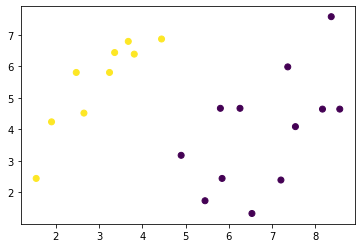

In [25]:
plt.scatter( data.x1 , data.x2 , c = data.label)

In [26]:

x = tf.placeholder( tf.float32 , [None , 2] )
y = tf.placeholder( tf.float32 , [None , 1] )

weight = tf.Variable( tf.zeros([2,1]) )
bias = tf.Variable( tf.zeros([1]) )

init_op = tf.global_variables_initializer()

I = tf.add(  tf.matmul(x,weight) , bias )

output = tf.sigmoid(I)

individual_loss = tf.nn.sigmoid_cross_entropy_with_logits( labels = y , logits = output )

loss = tf.reduce_mean( individual_loss )

gdo = tf.train.GradientDescentOptimizer( learning_rate = 0.01 )

train = gdo.minimize( loss )

In [27]:
sess = tf.Session()
sess.run(init_op)

In [28]:
print( 'weight : \n' , sess.run( weight ) )
print( 'bias : \n' , sess.run( bias ) )

weight : 
 [[0.]
 [0.]]
bias : 
 [0.]


In [29]:
for i in range(10000) :
    sess.run( train , feed_dict = { x : x_label , y : y_label } )

In [30]:
print( 'weight : \n' , sess.run( weight ) )
print( 'bias : \n' , sess.run( bias ) )

weight : 
 [[-2.0414152]
 [ 1.742471 ]]
bias : 
 [0.3445174]


In [32]:
result = sess.run( output , feed_dict = { x : x_label , y : y_label } )

y_pred = result.round()

y_pred

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [33]:
data['label_pred'] = y_pred

In [34]:
data

label      x1      x2  label_pred
0       1  2.6487  4.5192         1.0
1       1  1.5438  2.4443         1.0
2       1  1.8990  4.2409         1.0
3       1  2.4711  5.8097         1.0
4       1  3.3590  6.4423         1.0
5       1  3.2406  5.8097         1.0
6       1  3.8128  6.3917         1.0
7       1  4.4441  6.8725         1.0
8       1  3.6747  6.7966         1.0
9       0  7.5417  4.0891         0.0
10      0  7.2063  2.3937         0.0
11      0  6.5355  1.3310         0.0
12      0  5.4503  1.7358         0.0
13      0  5.8449  2.4443         0.0
14      0  4.8979  3.1781         0.0
15      0  5.8055  4.6711         0.0
16      0  7.3641  5.9868         0.0
17      0  6.2592  4.6711         0.0
18      0  8.3703  7.5810         0.0
19      0  8.5676  4.6457         0.0
20      0  8.1676  4.6457         0.0

In [36]:
accuracy_score( y_label , y_pred )

1.0

In [37]:
confusion_matrix( y_label , y_pred )

array([[12,  0],
       [ 0,  9]], dtype=int64)

# Inference - Prediction

In [35]:
x1 = [ [0,0] ]

pred_result = sess.run( output , feed_dict = {x : x1 } )

print(pred_result)

print(pred_result.round())

[[0.58528745]]
[[1.]]
